In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
delivery = pd.read_csv('delivery_time.csv')
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
delivery.shape

(21, 2)

In [4]:
delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
delivery.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [7]:
delivery.duplicated().sum()

0

In [8]:
delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [9]:
delivery.rename({'Delivery Time':'DT','Sorting Time':'ST'},axis=1,inplace=True)

In [10]:
delivery.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [11]:
delivery.skew()

DT    0.352390
ST    0.047115
dtype: float64

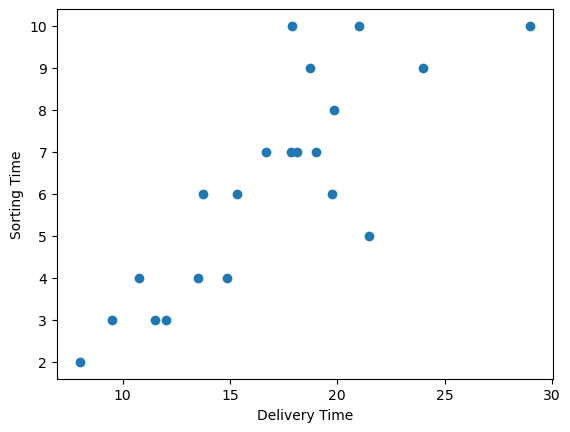

In [12]:
x = delivery.iloc[:,0]
y = delivery.iloc[:,1]
plt.scatter(x,y)
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DT', ylabel='Density'>

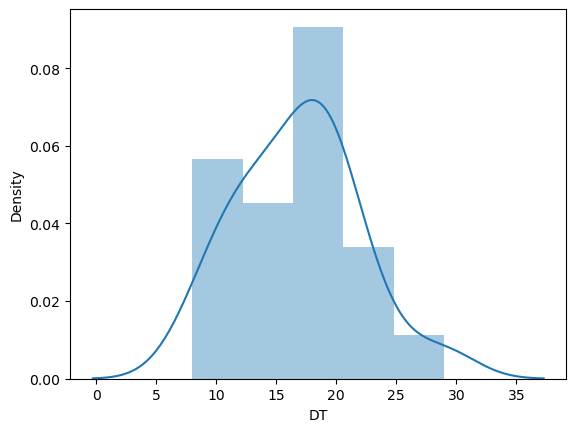

In [13]:
sns.distplot(delivery['DT'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ST', ylabel='Density'>

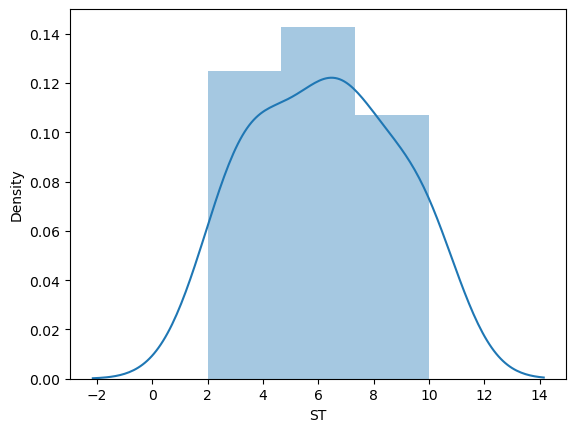

In [14]:
sns.distplot(delivery['ST'])

{'whiskers': [<matplotlib.lines.Line2D at 0x275d9908f70>,
 'caps': [<matplotlib.lines.Line2D at 0x275d9916550>,
 'boxes': [<matplotlib.lines.Line2D at 0x275d9908ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x275d9916af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x275d9916dc0>],
 'means': []}

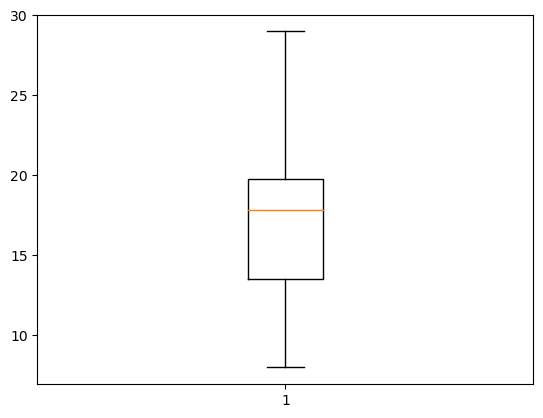

In [15]:
plt.boxplot(delivery['DT'])

{'whiskers': [<matplotlib.lines.Line2D at 0x275d9aabee0>,
 'caps': [<matplotlib.lines.Line2D at 0x275d9abb4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x275d9aabc10>],
 'medians': [<matplotlib.lines.Line2D at 0x275d9abba60>],
 'fliers': [<matplotlib.lines.Line2D at 0x275d9abbd30>],
 'means': []}

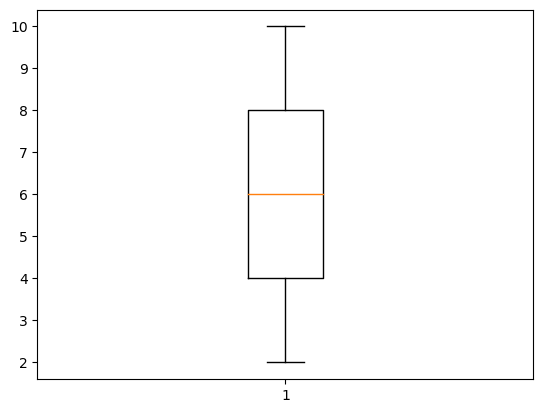

In [16]:
plt.boxplot(delivery['ST'])

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer

In [18]:
x_train,x_test,y_train,y_test=train_test_split(delivery[['DT']],delivery[['ST']],test_size=0.2,random_state=10)

In [19]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((16, 1), (5, 1), (16, 1), (5, 1))

In [20]:
pt = PowerTransformer(method='box-cox')
x_train =pt.fit_transform(x_train)
x_test = pt.transform(x_test)

In [21]:
sd = StandardScaler()
x_train =sd.fit_transform(x_train)
x_test = sd.transform(x_test)

In [22]:
x_train

array([[-2.13218681],
       [ 1.25851749],
       [ 0.02697592],
       [ 0.26599327],
       [-0.2108548 ],
       [ 0.08443891],
       [ 0.76770582],
       [ 0.04135751],
       [ 0.43386782],
       [-0.88558844],
       [-1.32520056],
       [-0.8315349 ],
       [ 0.66828429],
       [-0.58946357],
       [ 2.21252812],
       [ 0.21515993]])

In [23]:
#trf = FunctionTransformer(func=np.log1p)
#x_train=trf.fit_transform(x_train)
#x_test=trf.transform(x_test)

In [24]:
x_train

array([[-2.13218681],
       [ 1.25851749],
       [ 0.02697592],
       [ 0.26599327],
       [-0.2108548 ],
       [ 0.08443891],
       [ 0.76770582],
       [ 0.04135751],
       [ 0.43386782],
       [-0.88558844],
       [-1.32520056],
       [-0.8315349 ],
       [ 0.66828429],
       [-0.58946357],
       [ 2.21252812],
       [ 0.21515993]])

In [25]:
#sd = StandardScaler()
#x_train =sd.fit_transform(x_train)
#x_test = sd.transform(x_test)

In [26]:
x_train

array([[-2.13218681],
       [ 1.25851749],
       [ 0.02697592],
       [ 0.26599327],
       [-0.2108548 ],
       [ 0.08443891],
       [ 0.76770582],
       [ 0.04135751],
       [ 0.43386782],
       [-0.88558844],
       [-1.32520056],
       [-0.8315349 ],
       [ 0.66828429],
       [-0.58946357],
       [ 2.21252812],
       [ 0.21515993]])

In [27]:
lr =LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [28]:
y_pred = lr.predict(x_test)
y_pred

array([[4.34798945],
       [5.77556044],
       [7.58107227],
       [3.77843603],
       [3.20974001]])

In [29]:
r2=r2_score(y_test,y_pred)
print('R-squared :',r2)

rmse =np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE:',rmse)

R-squared : 0.5151826477888052
RMSE: 0.9444913594462357
